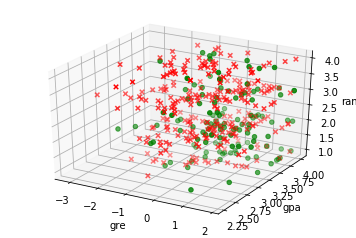

-------------- sklearn Linear Regression Result --------------
theta: [[ 0.00191587  0.21536348 -0.59840442]]
bias: [-1.18761281]
accuracy: 68.25%
Confusion matrix, without normalization
[[273   0]
 [127   0]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


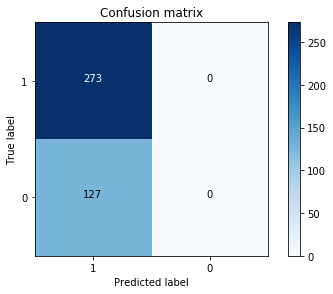

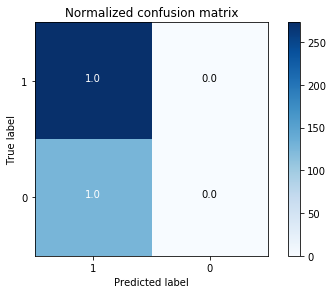

-------------- Tensorflow Result --------------
weights:  [[  5.14879823e-01  -4.67145354e-01  -9.30319075e-05]]
bias:  [ 0.77970845]
accuracy: 69.0%


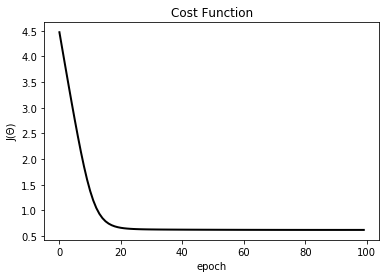

Confusion matrix, without normalization
[[266   7]
 [117  10]]
Normalized confusion matrix
[[ 0.97435897  0.02564103]
 [ 0.92125984  0.07874016]]


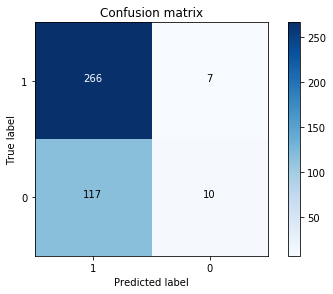

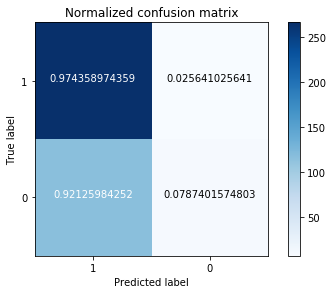

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 26 2017
Logistic Regression - Student Enrolling Admit
@author: cyrano
"""

import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix  

# 载入数据集
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('input/binary.csv', 'r')
    next(fr)
    
    for line in fr.readlines():
        lineArr = line.strip().split(',')
        dataMat.append([float(lineArr[1]), float(lineArr[2]), float(lineArr[3])])
        labelMat.append(int(lineArr[0]))
        
    return dataMat,labelMat

# 特征缩放 - 调节比例
def featureRescaling(mat,col):
    mat[:,col]=(mat[:,col]-mat[:,col].min())/(mat[:,col].max()-mat[:,col].min()) 
    return mat

# 特征缩放 - 标准化
def featureStandardization(mat,col):
    mat[:,col]=(mat[:,col]-mat[:,col].mean())/mat[:,col].std()
    return mat

# 激活函数 sigmoid
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

# 代价函数计算
def Cost(x_mat,y_mat,weights,bias):
    h = sigmoid(x_mat * np.mat(weights)+bias)
    c1 = y_mat.transpose()*np.log(h)
    c2 = (1-y_mat).transpose()*np.log(1-h)
    cost = (-1 * float(c1) + -1 * float(c2))/m
    return cost

#绘制代价函数示意图
def plotCost(all_cost):
    plt.plot(all_cost,'k-', label='line 1', linewidth=2)
    plt.ylabel("J(Θ)")
    plt.xlabel("epoch")
    plt.title("Cost Function")
    plt.show()   

    
#绘制样本三维散点图    
def plotAres3D():
    xcord1 = []; ycord1 = []; zcord1 = []
    xcord2 = []; ycord2 = []; zcord2 = []
    for i in range(m):
        if int(y_mat[i]) == 1:
            xcord1.append(x_mat[i,0]) 
            ycord1.append(x_mat[i,1])
            zcord1.append(x_mat[i,2])
        else:
            xcord2.append(x_mat[i,0])
            ycord2.append(x_mat[i,1])
            zcord2.append(x_mat[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xcord1, ycord1, zcord1, c='green', marker='o')
    ax.scatter(xcord2, ycord2, zcord2, c='red', marker='x')
    ax.set_xlabel('gre')  
    ax.set_ylabel('gpa')  
    ax.set_zlabel('rank') 

    plt.show()
   
#计算准确率    
def calcAccracy(x_mat, y_mat, weights, bias):
    correct = 0
    for i in range(m):
        h = sigmoid(x_mat[i,:] * weights + bias)[0,0] > 0.5
        if h == bool(y_mat[i,0]):
            correct += 1
    accuracy = float(correct) / m * 100
    return accuracy

#绘制准确率示意图
def plotAccuracy(all_accuracy):
    plt.plot(all_accuracy,'k-', label='line 1', linewidth=2)
    plt.ylabel("accuracy %")
    plt.xlabel("epoch")
    plt.title("Accuracy")
    plt.show() 

#输出预测结果
def calcPred(x_mat, weights, bias):
    yPred = []
    for i in range(m):
        if (sigmoid(x_mat[i,:] * weights + bias)[0,0] > 0.5):
            yPred.append(1)
        else:
            yPred.append(0)
            
    return yPred

#绘制混淆矩阵
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    
######################################

x, y = loadDataSet()

x_mat = featureStandardization(np.mat(x), 0)
y_mat = np.mat(y).transpose()

m,n = np.shape(x_mat)

#print("x vectors:")
#print(x_mat)
#print("y vectors:")
#print(y_mat)

plotAres3D()

print("-------------- sklearn Linear Regression Result --------------")

from sklearn import linear_model

lr = linear_model.LogisticRegression()
lr.fit(x,y)

theta = lr.coef_
bias = lr.intercept_

print("theta: " + str(theta))
print("bias: "+ str(bias))

accuracy = calcAccracy(x_mat, y_mat, theta.transpose(), bias)
print("accuracy: " + str(accuracy) + "%")

y_pred = calcPred(x_mat, np.mat(theta.transpose()), bias)
cnf_matrix = confusion_matrix(y, y_pred, labels = list(set(y)))  

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="10",
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="10", normalize=True,
                      title='Normalized confusion matrix')

plt.show()


print("-------------- Tensorflow Result --------------")

import tensorflow as tf

x_train = featureStandardization(np.mat(x), 0)
y_train = featureStandardization(np.mat(y).transpose(),0)

m,n = np.shape(x_train)

rate = 0.0001
epoch = 100

X = tf.placeholder("float")  
Y = tf.placeholder("float") 
W = tf.Variable(tf.ones([3,1])) 
b = tf.Variable(tf.random_normal([1])) 

all_cost = []
all_rsquare = []

pred = tf.sigmoid(tf.add(tf.matmul(X,W),b))
c1 = y_mat.transpose()*tf.log(pred)
c2 = (1-y_mat).transpose()*tf.log(1-pred)
loss = (-1 * c1 + -1 * c2)/m 
optimizer = tf.train.GradientDescentOptimizer(rate).minimize(loss)  

init = tf.global_variables_initializer()

# Second part: launch the graph
sess = tf.Session()  
sess.run(init)  

for i in range(epoch): 
    sess.run(optimizer,{ X:x_train, Y:y_train }) 
    all_cost.append(Cost(x_train, y_train, sess.run(W), sess.run(b)))

W = sess.run(W)
b = sess.run(b)
print("weights: ", W.transpose())
print("bias: ", b)

accuracy = calcAccracy(x_train, y_train, W, b)
print("accuracy: " + str(accuracy) + "%")

plotCost(all_cost)

h = calcPred(x_mat, np.mat(W), b)
cnf_matrix = confusion_matrix(y_train, h, labels = list(set(y)))  

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="10", title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="10", normalize=True, title='Normalized confusion matrix')

plt.show()
